In [26]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [27]:
from solvers import prepare_fdm_poisson_solve,prepare_GP_solver,prepare_solve_poisson_fdm_inhomogeneus,prepare_spectral_poisson_solve

sin(4*pi*x)*sin(2*pi*y)
-20*pi**2*sin(4*pi*x)*sin(2*pi*y)


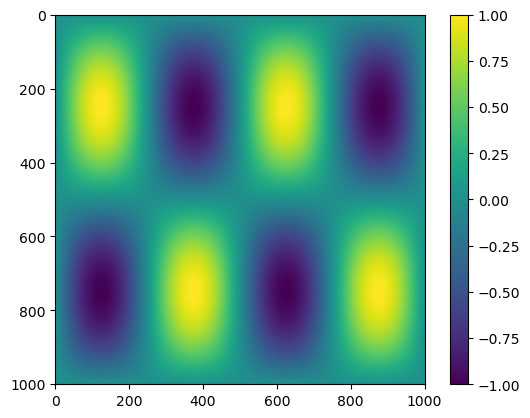

In [28]:

#create a symbolic function u, compute its laplacian and use this as the right hand side
x,y=sympy.symbols('x y')
u=sympy.sin(2*2*sympy.pi*x)*sympy.sin(2*sympy.pi*y)
#u=sin(2*sympy.pi*x*sympy.exp(3*sin(pi*x)))*sin(4*pi*sin(pi*y))
#u=sin(pi*x)*sin(pi*y)
freq_coeff=2
#u=sin((exp(freq_coeff*sin(pi*x))-1))*sin((exp(freq_coeff*sin(pi*y))-1))
assert u.subs(x,0)==0 ,print(u.subs(x,0))
assert u.subs(x,1)==0 ,print(u.subs(x,1))
assert u.subs(y,0)==0 ,print(u.subs(y,0))
assert u.subs(y,1)==0 ,print(u.subs(y,1))
print(u)
uxx=sympy.diff(u,x,x)
uyy=sympy.diff(u,y,y)
print(uxx+uyy)
uxx=sympy.lambdify((x,y),uxx,'numpy')
u=sympy.lambdify((x,y),u,'numpy')
uyy=sympy.lambdify((x,y),uyy,'numpy')

f=lambda x: uxx(x[0],x[1])+uyy(x[0],x[1])




N_target=1000

x = np.linspace(0,1,N_target+1,endpoint=True,dtype=np.float64)
y = np.linspace(0,1,N_target+1,endpoint=True,dtype=np.float64)
X,Y = np.meshgrid(x,y)
u_truth=u(X,Y)


plt.figure()
plt.imshow(u_truth)
plt.colorbar()
plt.show()

In [29]:
solver_fdm_asym_left=prepare_solve_poisson_fdm_inhomogeneus(
    N1=55,
    N2=55,
    L1=0.4,
    L2=0.6)
solver_fdm_asym_right=prepare_solve_poisson_fdm_inhomogeneus(
    N1=55,
    N2=55,
    L1=0.6,
    L2=0.4)
solver_fdm=prepare_fdm_poisson_solve(N=1000)
solver_GP=prepare_GP_solver(N=1000)
solver_spectral=prepare_spectral_poisson_solve(N=100)
solvers=[solver_fdm_asym_left,solver_fdm_asym_right,solver_fdm,solver_GP,solver_spectral]

In [30]:
sols=[solver(f,N_target) for solver in solvers]

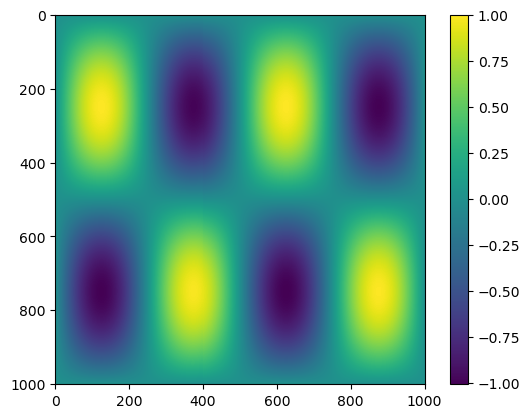

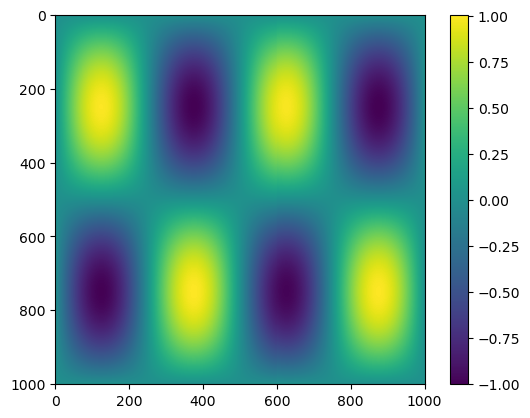

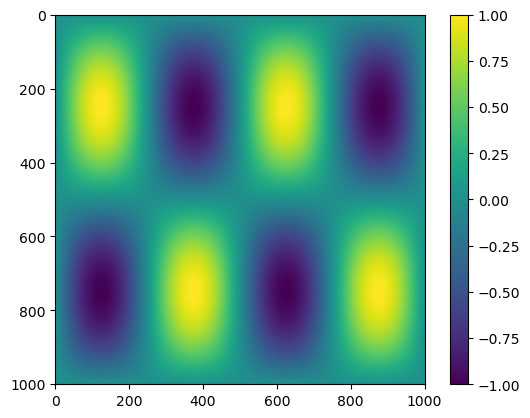

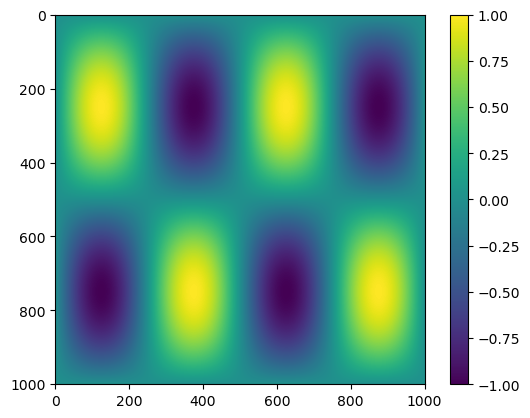

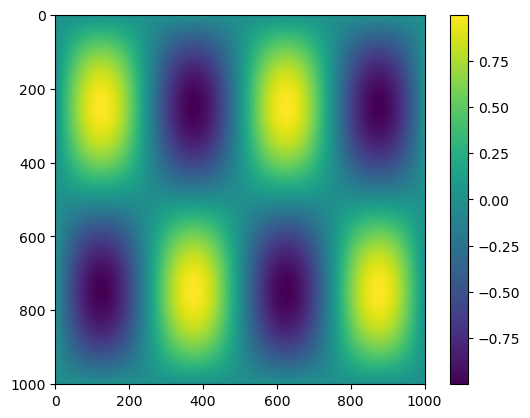

In [31]:
for sol in sols:
    plt.figure()
    plt.imshow(sol)
    plt.colorbar()
    plt.show()